# Ước lượng khoảng tin cậy với cỡ mẫu nhỏ

Để ước tính khoảng tin cậy cho trung bình của tổng thể với kích thước mẫu nhỏ, bạn cần xem xét cẩn thận do sự không chắc chắn gia tăng khi có dữ liệu hạn chế. Khi kích thước mẫu nhỏ, thường sử dụng phân phối t thay vì phân phối chuẩn để tính đến biến động. Dưới đây là cách bạn có thể ước tính khoảng tin cậy cho trung bình của dân số với kích thước mẫu nhỏ:

1. **Thu thập và Tóm tắt Dữ liệu**:
   Thu thập dữ liệu mẫu của bạn và tính trung bình mẫu ($\bar{x}$) và độ lệch chuẩn mẫu ($s$).

2. **Chọn Mức Độ Tin Cậy**:
   Quyết định mức độ tin cậy mong muốn cho khoảng tin cậy, thường là 95% hoặc 99%.

3. **Tính Giá Trị t-Critical**:
   Tìm giá trị t-critical liên quan đến mức độ tin cậy đã chọn và bậc tự do, với bậc tự do cho mẫu kích thước $n$ là $n - 1$.

4. **Tính Toán Sai Số Chuẩn**:
   Tính sai số chuẩn ($SE$) của trung bình mẫu bằng công thức:
   $$ SE = \frac{s}{\sqrt{n}} $$

5. **Tính Toán Sai Số Biên**:
   Tính sai số biên ($MOE$) bằng công thức:
   $$ MOE = t_{\text{critical}} \times SE $$

6. **Tính Khoảng Tin Cậy**:
   Khoảng tin cậy được tính bằng cách trừ và cộng sai số biên từ trung bình mẫu:
   $$ \text{Khoảng Tin Cậy} = \bar{x} \pm MOE $$

Dưới đây là ví dụ về cách tính khoảng tin cậy bằng Python:


Lưu ý với kích thước mẫu nhỏ, **khoảng tin cậy kết quả có thể rộng**, cho thấy mức độ không chắc chắn tương đối cao. Khi kích thước mẫu tăng lên, khoảng tin cậy sẽ trở nên hẹp hơn, cung cấp một ước tính chính xác hơn về trung bình của tổng thể.

In [4]:
import scipy.stats as stats
import numpy as np

# Dữ liệu mẫu
sample_data = [12, 14, 15, 17, 18, 19, 20]
n = len(sample_data)

# Tính trung bình mẫu và độ lệch chuẩn mẫu
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # Sửa đổi Bessel cho độ lệch chuẩn mẫu

# Đặt mức độ tin cậy
confidence_level = 0.95

# Tính độ tự do
degrees_of_freedom = n - 1

# Tính giá trị t-critical
t_critical = stats.t.ppf(1 - (1 - confidence_level) / 2, df=degrees_of_freedom)

# Tính sai số chuẩn
SE = sample_std / np.sqrt(n)

# Tính sai số biên
MOE = t_critical * SE

# Tính khoảng tin cậy
confidence_interval = (sample_mean - MOE, sample_mean + MOE)

print("Trung bình mẫu:", sample_mean)
print("Khoảng tin cậy:", confidence_interval)


Trung bình mẫu: 16.428571428571427
Khoảng tin cậy: (13.766410649936082, 19.09073220720677)


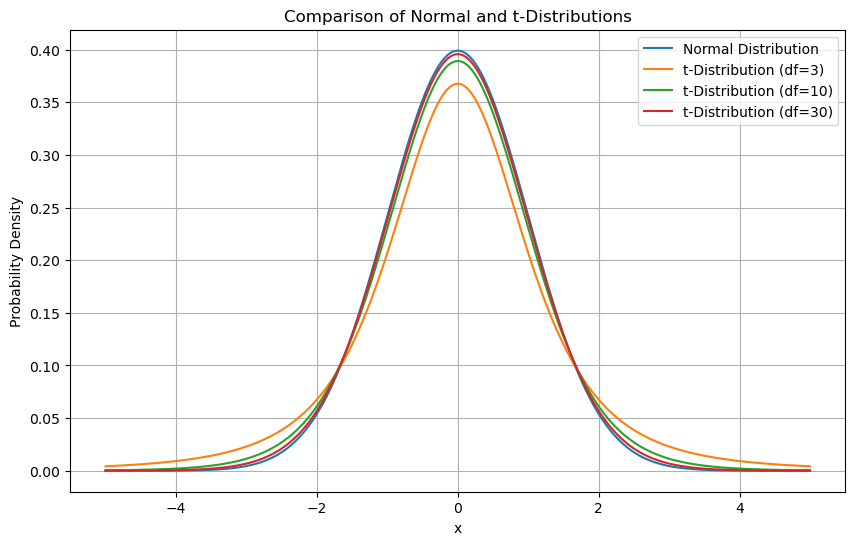

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the t-distribution
degrees_of_freedom = [3, 10, 30]
x_range = np.linspace(-5, 5, 500)

# Generate data for the normal distribution
normal_pdf = stats.norm.pdf(x_range, 0, 1)

# Generate data for t-distributions with different degrees of freedom
t_distributions = [stats.t.pdf(x_range, df) for df in degrees_of_freedom]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, normal_pdf, label='Normal Distribution')

for i, df in enumerate(degrees_of_freedom):
    plt.plot(x_range, t_distributions[i], label=f't-Distribution (df={df})')

plt.title('Comparison of Normal and t-Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


Trong biểu đồ này, bạn sẽ thấy đường cong mật độ xác suất cho phân phối chuẩn tiêu chuẩn và phân phối t-Student với các độ tự do khác nhau (3, 10 và 30). Khi độ tự do tăng lên, phân phối t-Student tiến dần tới phân phối chuẩn. Với các độ tự do nhỏ hơn, phân phối t-Student `có đuôi dày` và `đỉnh phẳng `hơn so với phân phối chuẩn. Khi độ tự do tăng lên, phân phối t-Student trở nên giống phân phối chuẩn hơn.